### global fundation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

#### test

$\kappa C_1,\kappa C_2\to\text{Gyr}^{-1}$  
$\kappa=\dfrac{\langle\sigma v\rangle}{M_x}\to\dfrac{\text{cm}^3\text{s}^{-1}}{\text{GeV}}$  
$\dfrac{8\pi GC_1}{3H_0^2}=\Omega_{1,0}=1-\Omega_{2,0}$

In [2]:
# caculate kappa
import astropy.units as u
import astropy.constants as const

G = const.G
c = const.c

kC1 = 1e-4 / u.Gyr
O20 = 0.3
H0 = 70 * u.km / u.s / u.Mpc

f = 3 * (100*u.km/u.s/u.Mpc)**2 / (8 * np.pi * G) * c**2
f = f * 1e-23 * u.cm**3 /u.s * u.Gyr
f = f.to(u.GeV)

C1 = (1 - O20) * 3 * H0**2 / (8 * np.pi * G)

kappa = kC1 / C1 / (c**2)

kappa = kappa.to(u.cm**3 / u.s / u.GeV)

print(f"kappa={kappa:.2e}")

kappa=8.77e-16 cm3 / (GeV s)


$\langle\sigma v\rangle\sim 10^{-23}\text{cm}^3\text{s}^{-1}$

$\langle\sigma v\rangle C_1=M_x\cdot\kappa C_1\to\text{GeV}\cdot\text{Gyr}^{-1}$

In [3]:
section = 1e-23 * u.cm**3 / u.s

cross = section * C1 * c**2

cross = cross.to(u.GeV / u.Gyr)

print(f"cross={cross:.2e}")

cross=1.14e-12 GeV / Gyr


### function solution

$z''(t)=\frac{H_0^4\kappa C_1\Omega_{1,0}^2(z(t)^4+1)+3H_0^4\Omega_{1,0}^2z(t)^2(2\kappa C_1-3z'(t))+H_0^4\Omega_{1,0}^2z(t)^3(4\kappa C_1-3z'(t))-3H_0^4\Omega_{1,0}^2z'(t)+5H_0^2\Omega_{1,0}z'(t)^3-\kappa C_1z'(t)^4+H_0^2\Omega_{1,0}z(t)(4H_0^2\kappa C_1\Omega_{1,0}-9H_0^2\Omega_{1,0}z'(t)+5z'(t)^3)}{2H_0^2\Omega_{1,0}(1+z(t))^2z'(t)}$

In [4]:
import solution

### OHD(only CC)

$H(z)=-\dfrac{1}{1+z}\dfrac{\text{d}z}{\text{d}t}$

100%|██████████| 2000/2000 [05:14<00:00,  6.36it/s]


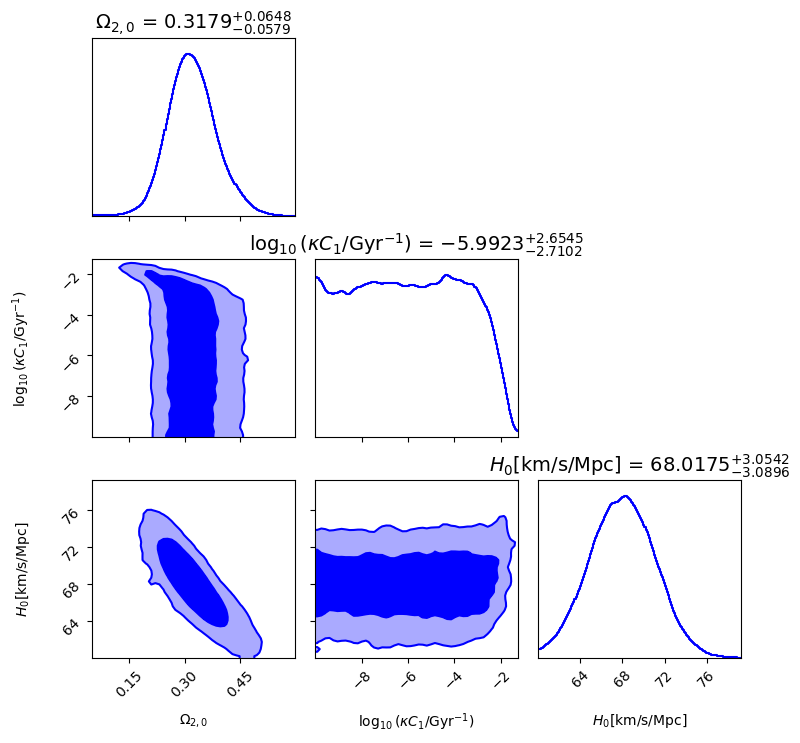

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


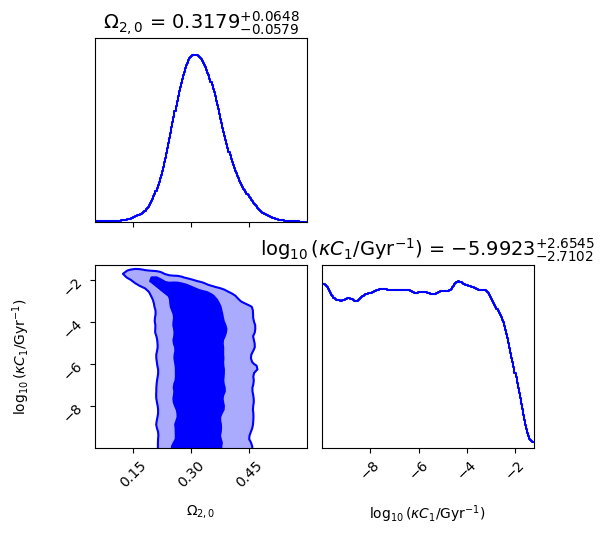

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


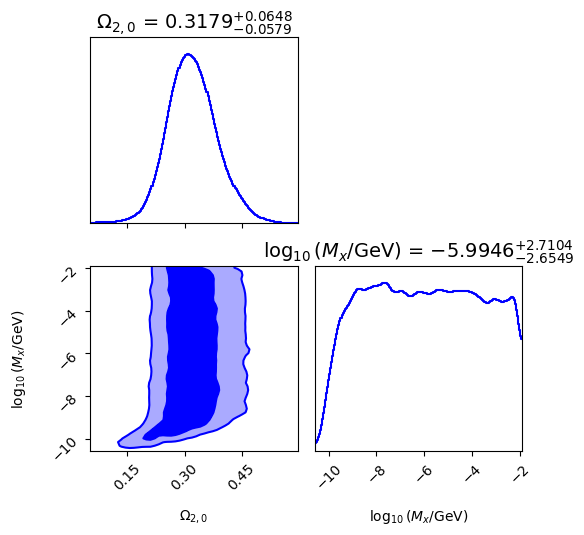

In [5]:
import multiprocessing as mp
from OHD.result import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### SNe Ia

$\displaystyle d_L=c(1+z)\int_0^z\frac{dz'}{H(z')}=c(1+z)\left[t_0-t+\int_t^{t_0}z(t')dt'\right]$

$m=M+5\log(d_L)+25$

In [6]:
""" # chi2_1
import multiprocessing as mp
from SNe.result1 import main

if __name__ == '__main__':
    mp.freeze_support()
    main() """

" # chi2_1\nimport multiprocessing as mp\nfrom SNe.result1 import main\n\nif __name__ == '__main__':\n    mp.freeze_support()\n    main() "

100%|██████████| 2000/2000 [10:55<00:00,  3.05it/s]


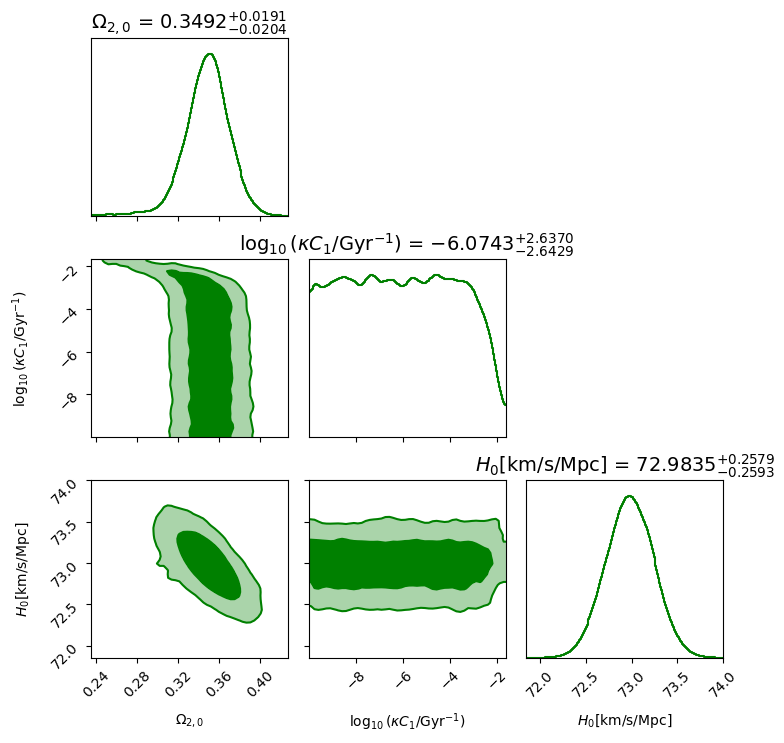

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


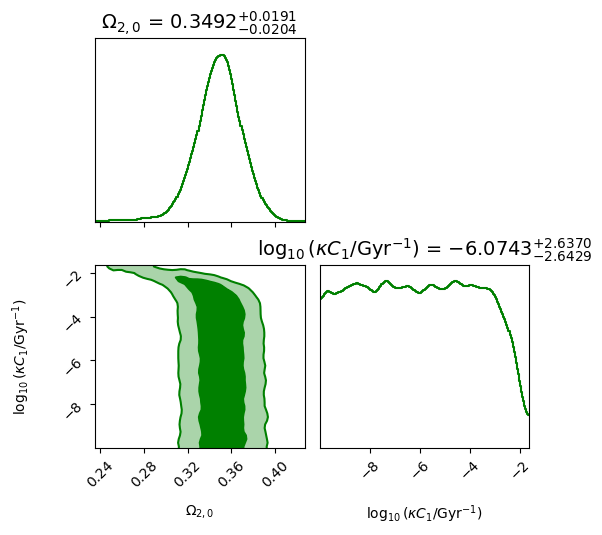

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


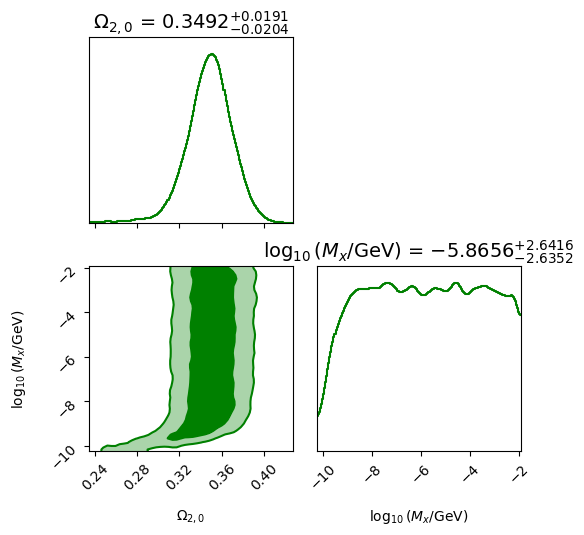

In [7]:
# chi2_2
import multiprocessing as mp
from SNe.result2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### BAO

$\displaystyle D_M(z)=\frac{c}{H_0\sqrt{\Omega_K}}\sinh\left[\sqrt{\Omega_K}\int_0^z\frac{\text{d}z'}{H(z')/H_0}\right]=r_d/\Delta\theta\\$  
when $\displaystyle\Omega_k\to0,D_M(z)=c\int_0^z\frac{\text{d}z'}{H(z')}$

$D_H(z)=c/H(z)=r_d/\Delta z$

$F_{AP}(z)=D_M(z)/D_{H}(z)$

$\displaystyle D_V(z)=(zD_M(z)^2D_H(z))^{1/3}=c\left[z\left(\int_0^z\frac{\text{d}z'}{H(z')}\right)^2\frac{1}{H(z)}\right]^{1/3}$

$\displaystyle r_d=\int_{z_d}^{\infty}\frac{c_s(z)}{H(z)}\text{d}z$

$\displaystyle c_s(z)=\frac{c}{\sqrt{3\left(1+\dfrac{3\rho_B(z)}{4\rho_{\gamma}(z)}\right)}}$

/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  H0**4 * kC1 * O10**2 * (z[0]**4 + 1) +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dz2 = numerator / denominator
100%|██████████| 2000/2000 [02:11<00:00, 15.22it/s]


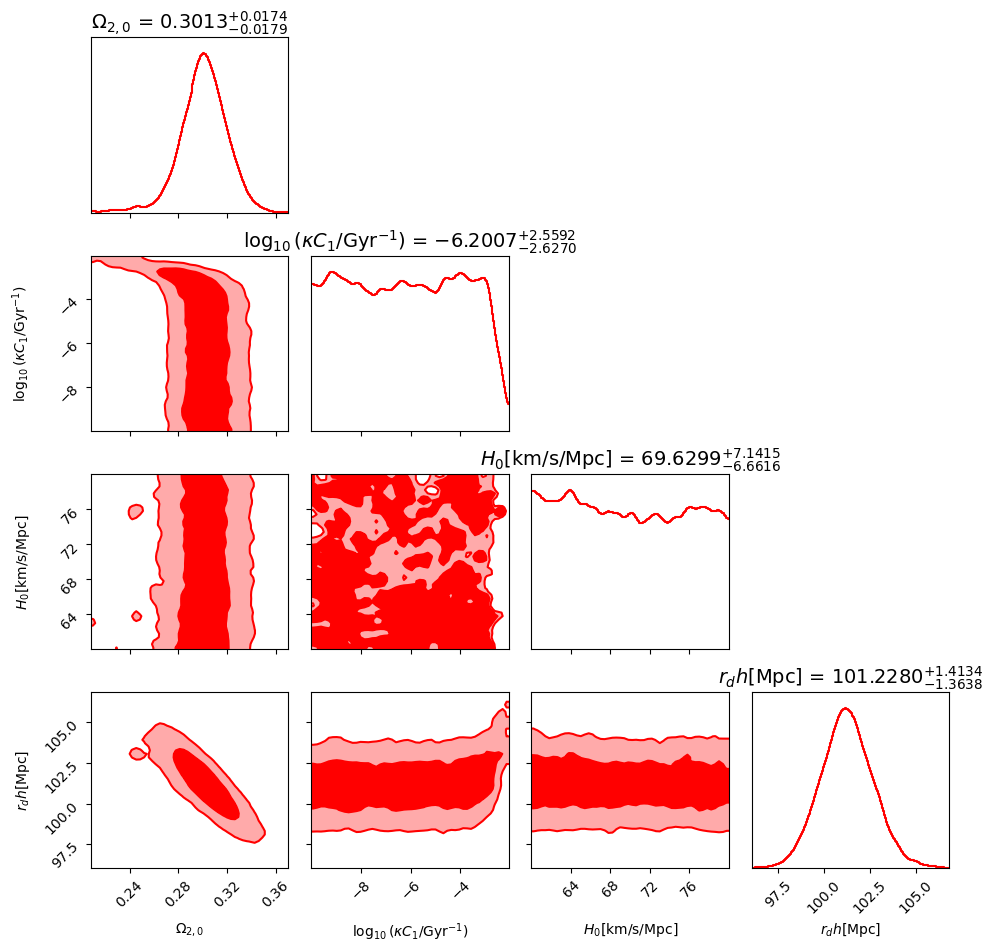

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


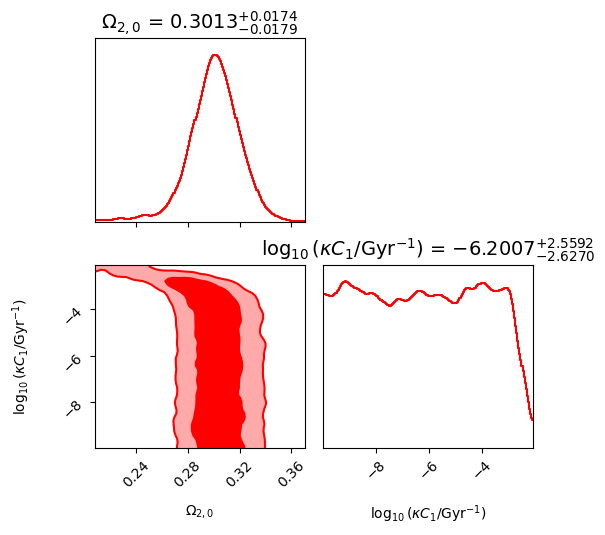

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


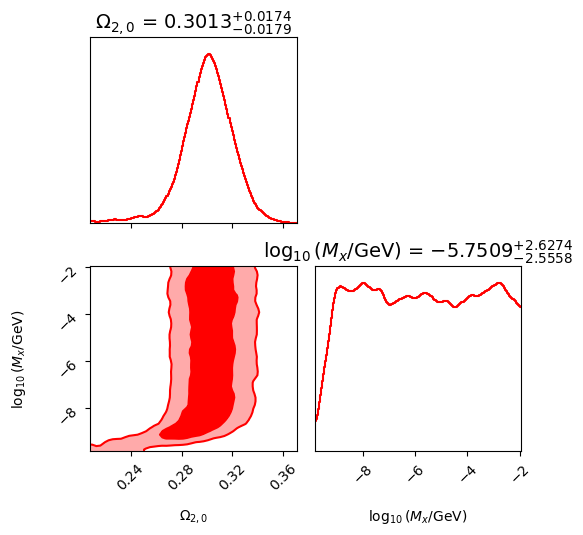

In [8]:
import multiprocessing as mp
from BAO.result import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### CMB

### combination

100%|██████████| 2000/2000 [12:46<00:00,  2.61it/s]


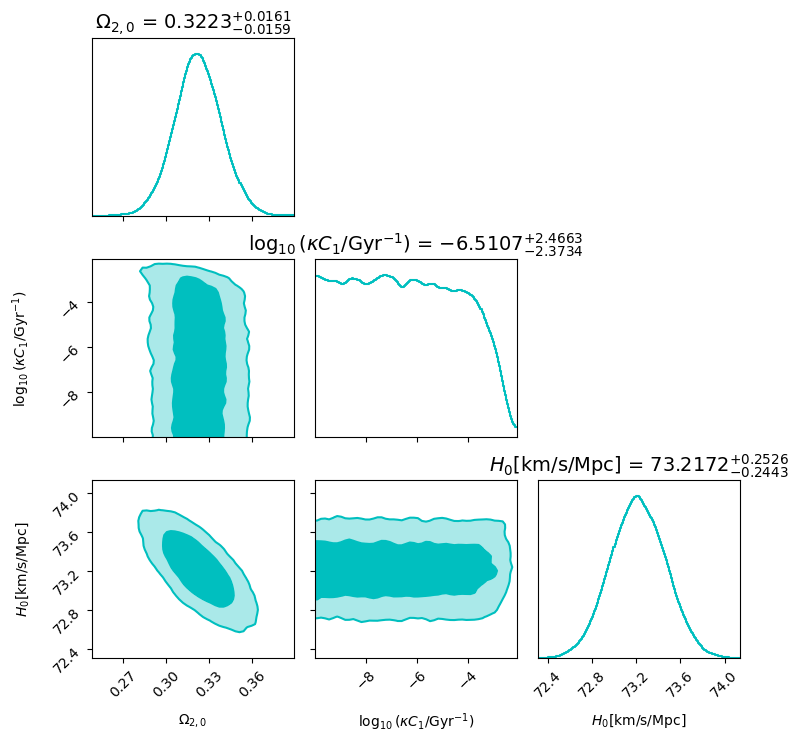

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


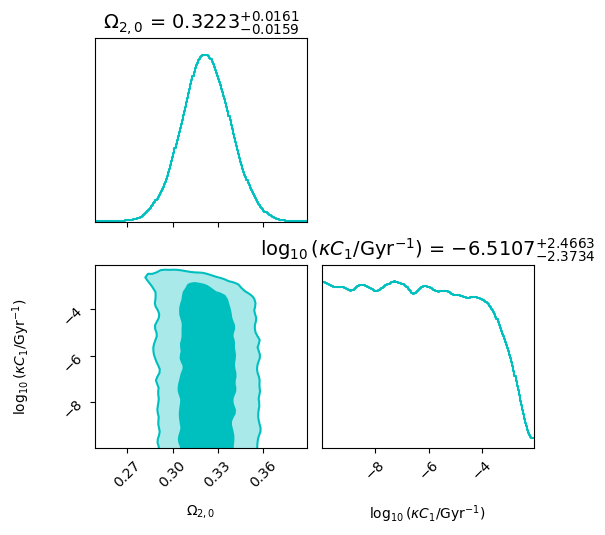

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


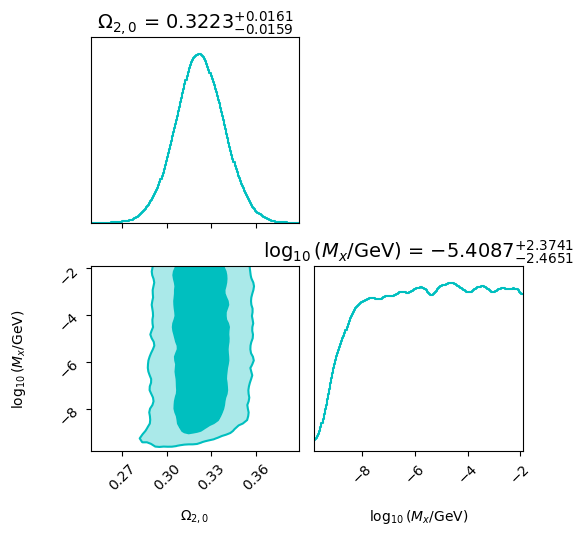

In [9]:
import multiprocessing as mp
from multimethods.methods2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  H0**4 * kC1 * O10**2 * (z[0]**4 + 1) +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dz2 = numerator / denominator
100%|██████████| 2000/2000 [15:08<00:00,  2.20it/s]


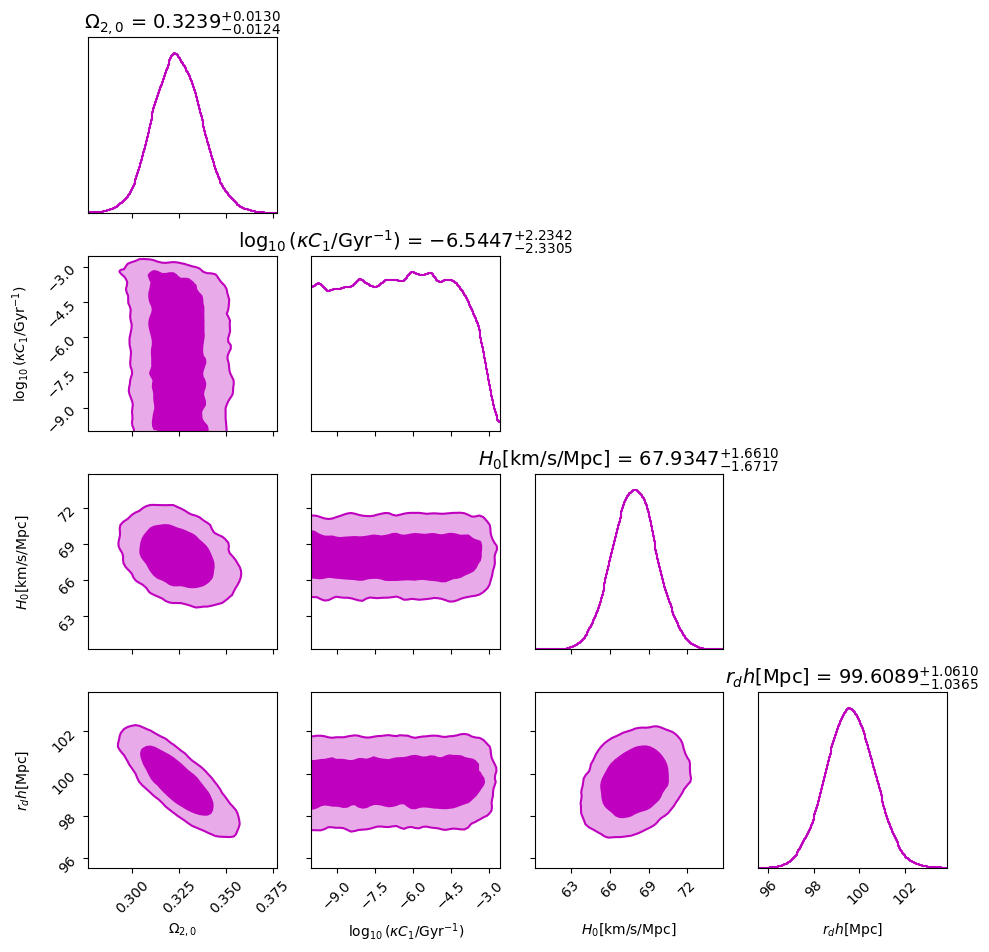

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


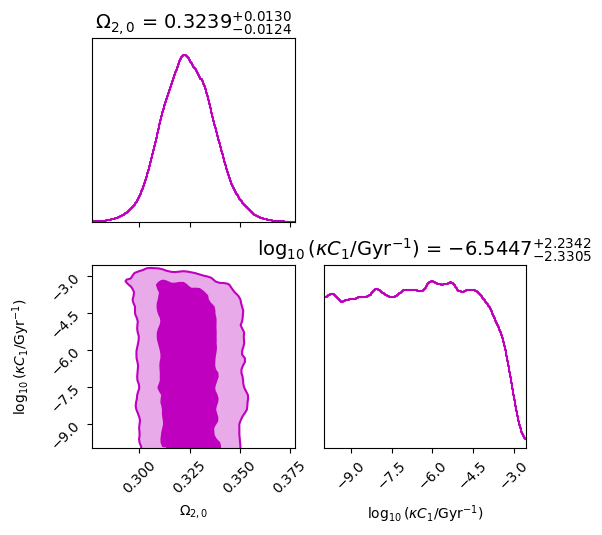

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


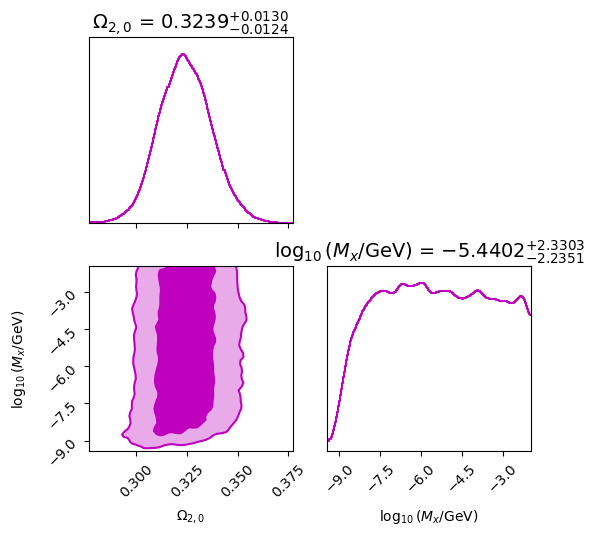

In [10]:
import multiprocessing as mp
from multimethods.methods3 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### wIDM

$\left(\dfrac{H}{H_0}\right)^2=\Omega_{1,0}(1+z)^{-n}+\Omega_{2,0}(1+z)^3$

100%|██████████| 5000/5000 [00:06<00:00, 817.42it/s]


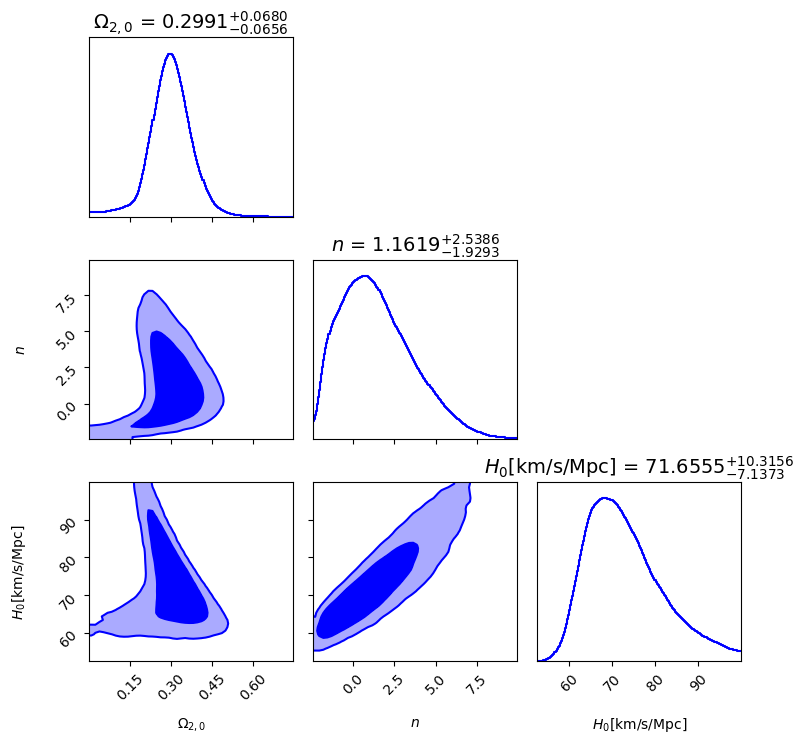

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


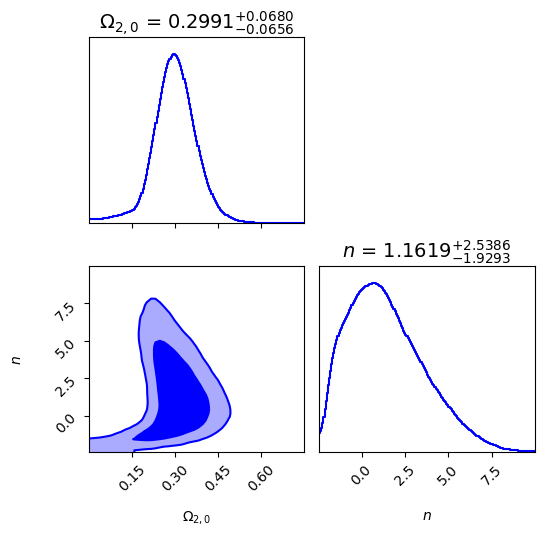

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


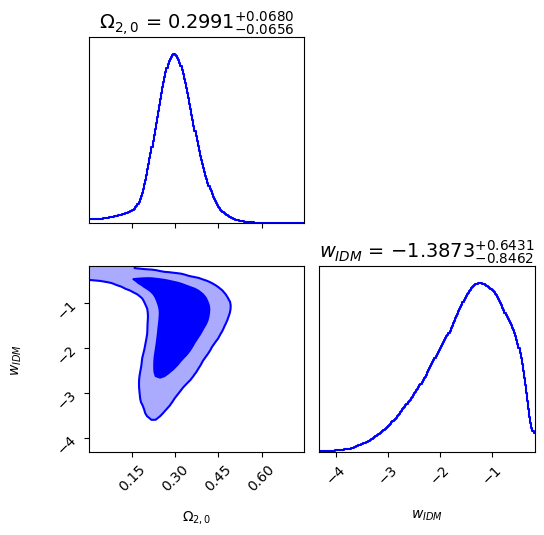

In [11]:
import multiprocessing as mp
from wIDM.OHD import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [04:35<00:00,  7.27it/s]


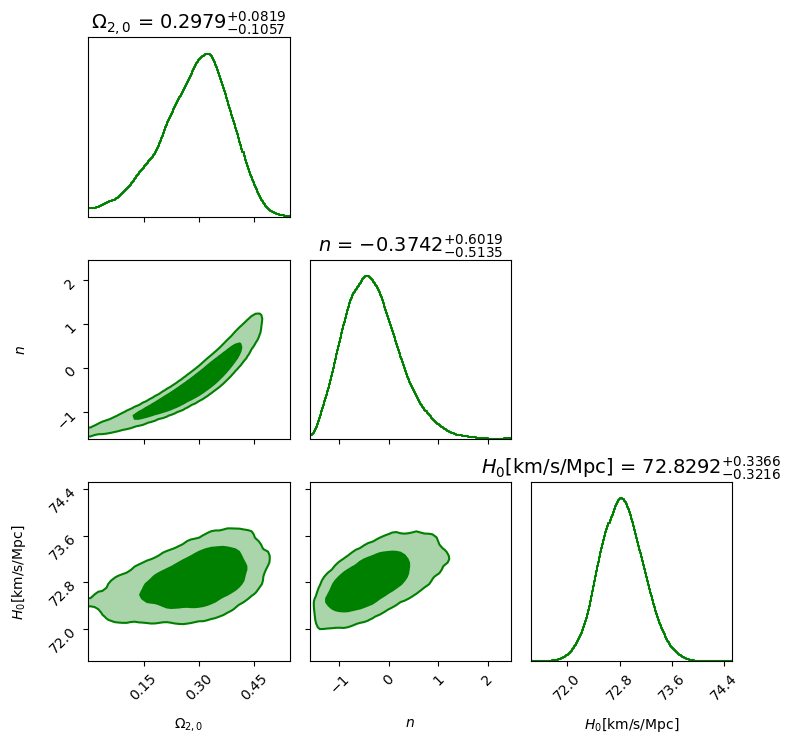

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


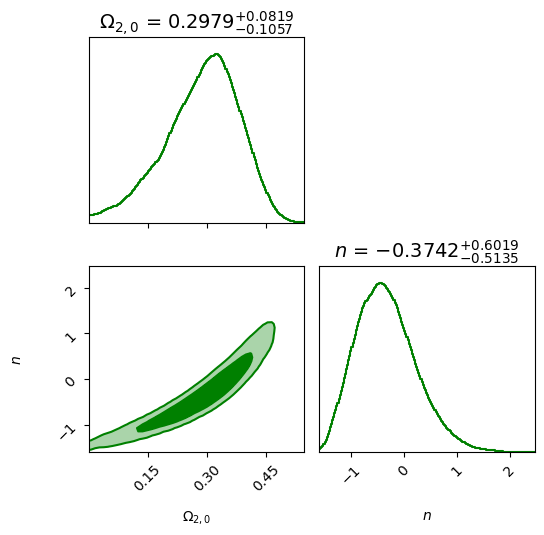

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


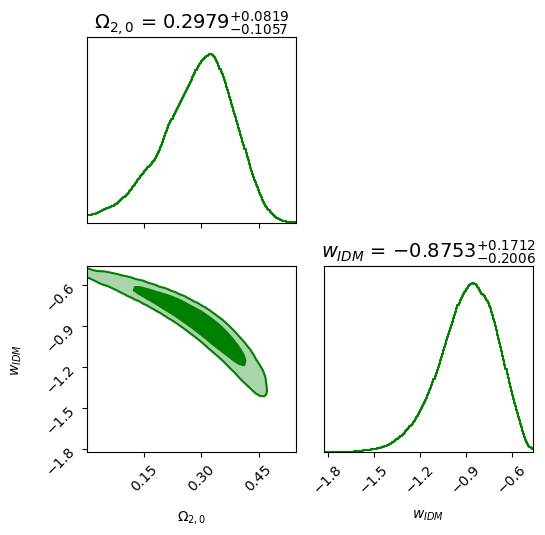

In [12]:
import multiprocessing as mp
from wIDM.SNe import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 5000/5000 [00:07<00:00, 632.57it/s]


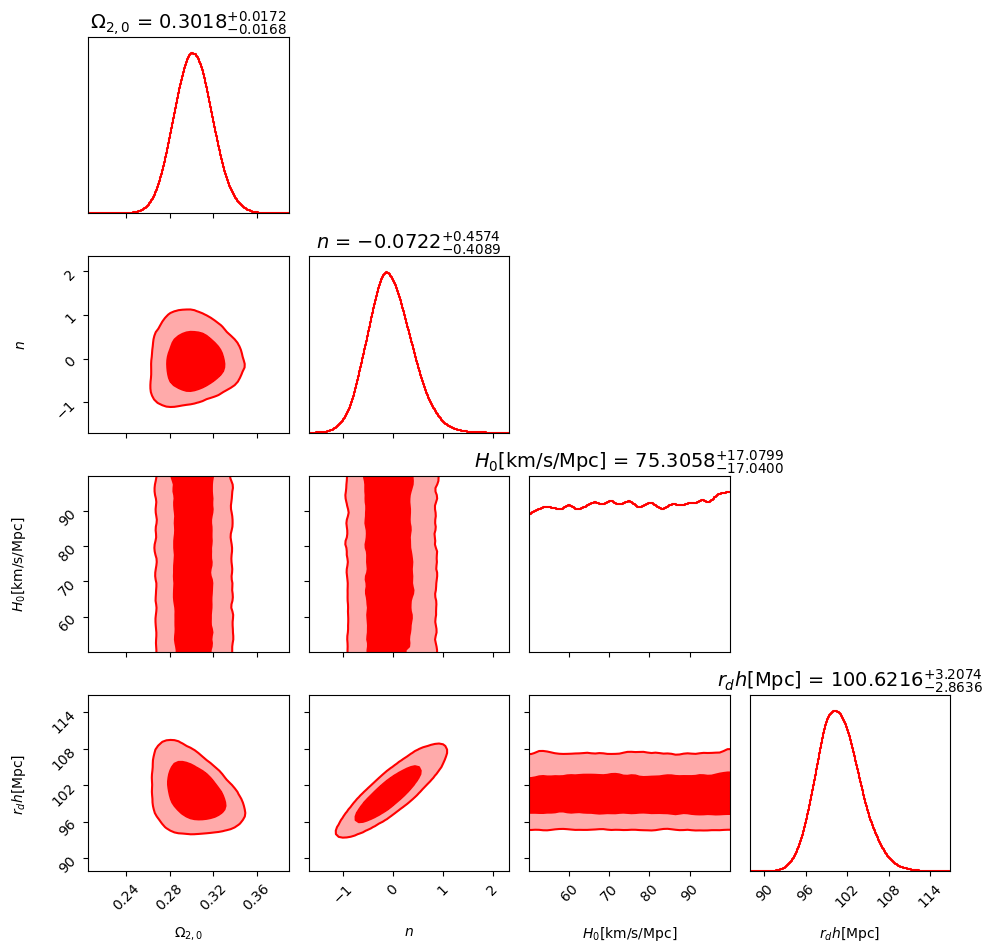

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


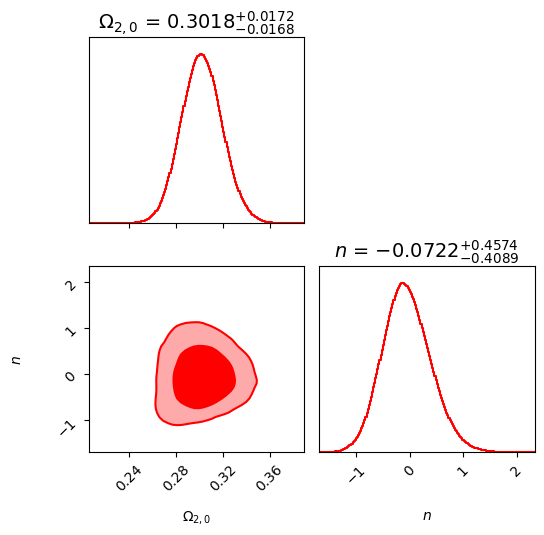

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


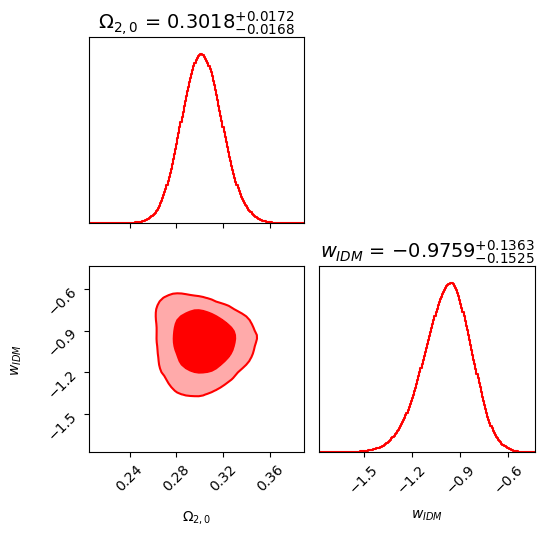

In [13]:
import multiprocessing as mp
from wIDM.BAO import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [04:42<00:00,  7.09it/s]


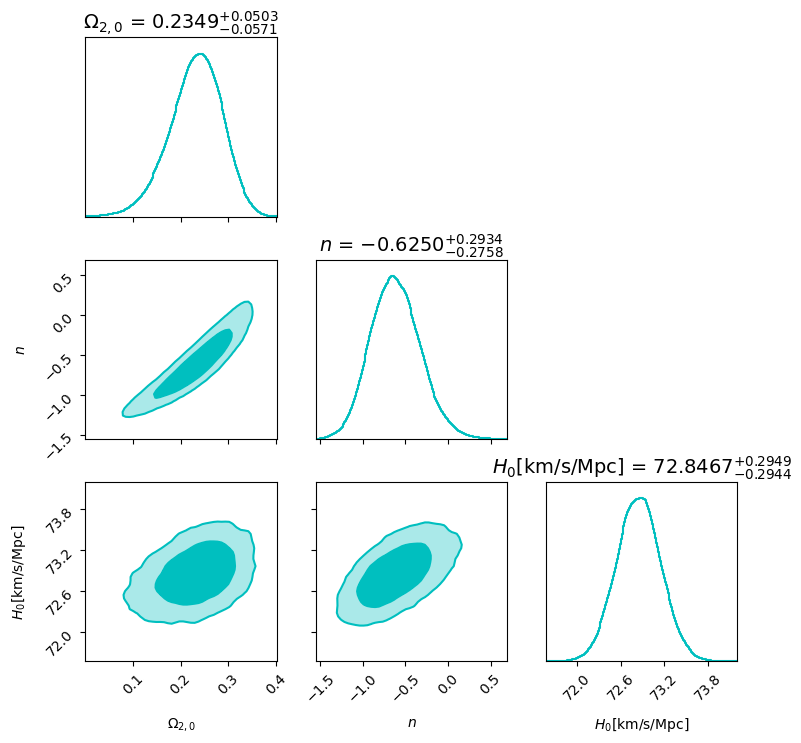

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


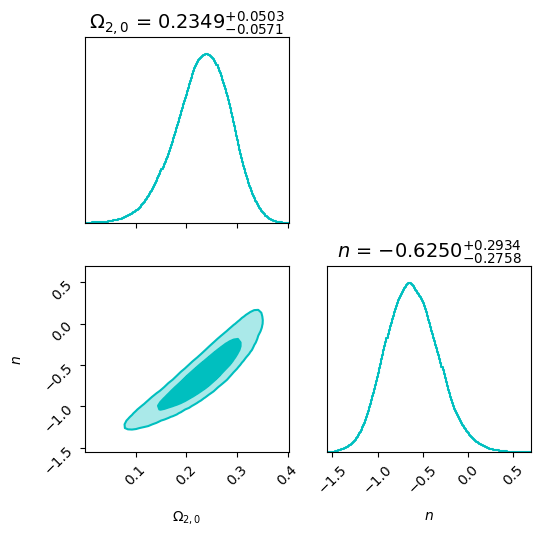

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


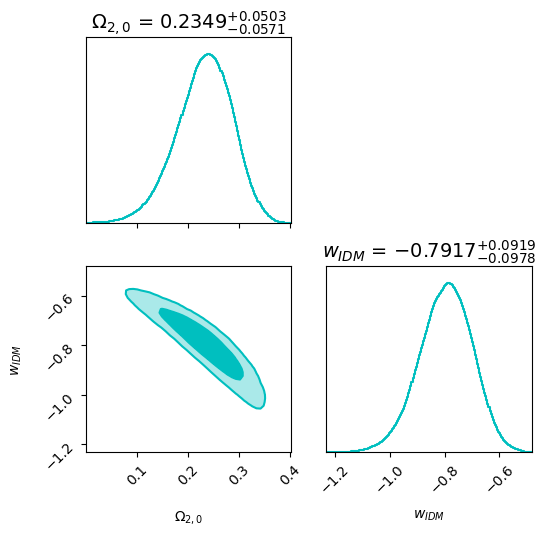

In [14]:
import multiprocessing as mp
from wIDM.methods2 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

100%|██████████| 2000/2000 [04:52<00:00,  6.83it/s]


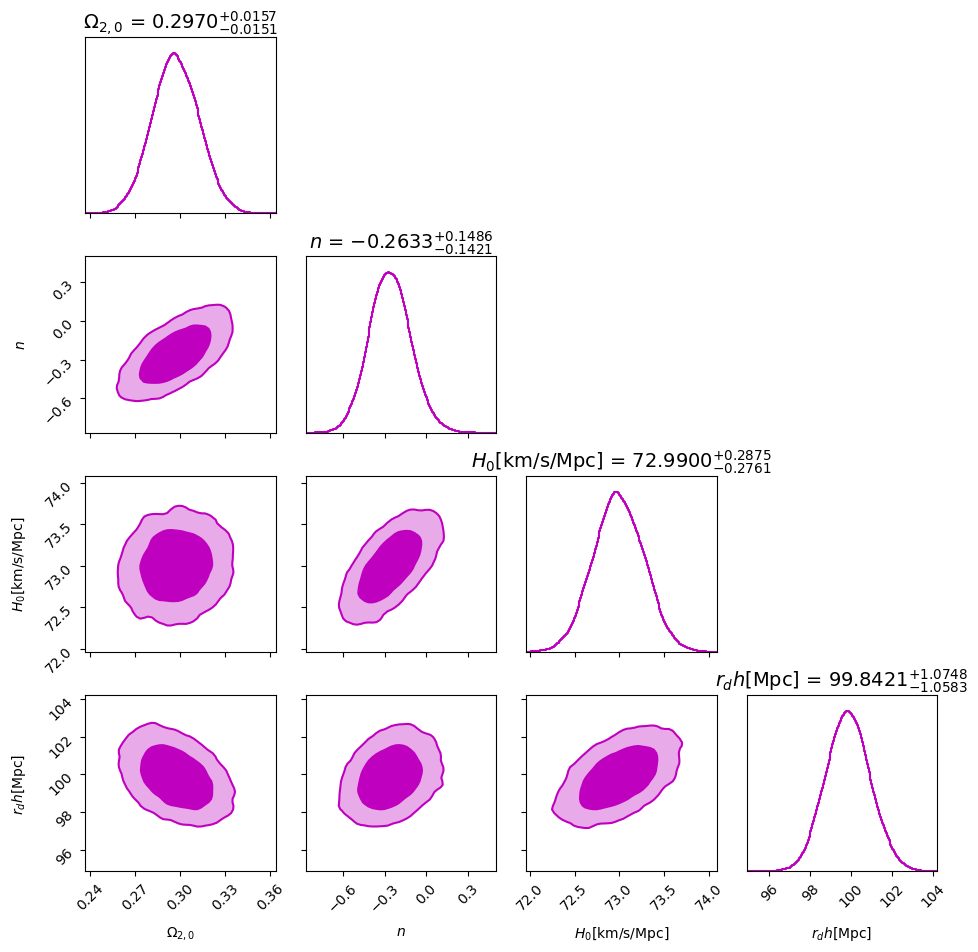

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


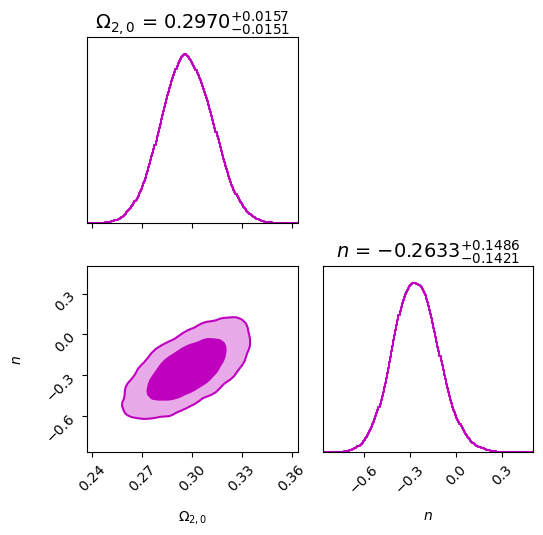

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


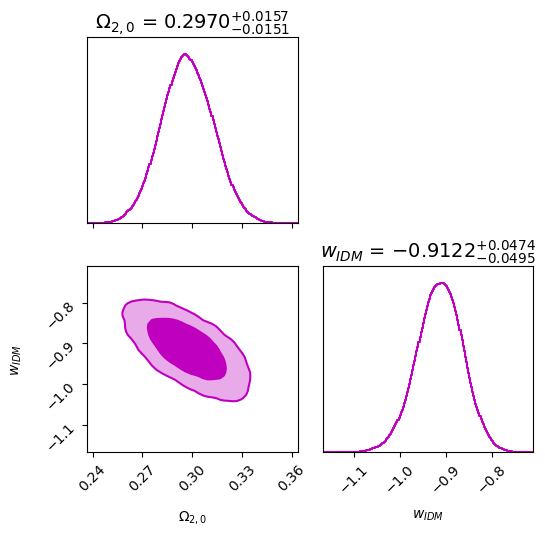

In [15]:
import multiprocessing as mp
from wIDM.methods3 import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

### $\Omega_{2,0}$ gaussian pdf & $\log_{10}{\kappa}C_1/M_x$ cdf

100%|██████████| 2000/2000 [13:22<00:00,  2.49it/s]
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  H0**4 * kC1 * O10**2 * (z[0]**4 + 1) +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:33: RuntimeWarning: invalid value encountered in scalar divide
  dz2 = numerator / denominator
100%|██████████| 2000/2000 [02:13<00:00, 15.04it/s]
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:29: RuntimeWarning: overflow encountered in scalar power
  kC1 * z[1]**4 +
/Users/kaltsit33/Library/CloudStorage/OneDrive-Personal/Yixuan Zhu/Astro-Physics/IDM/solution.py:24: RuntimeWarning: invalid value encountered in scalar subt

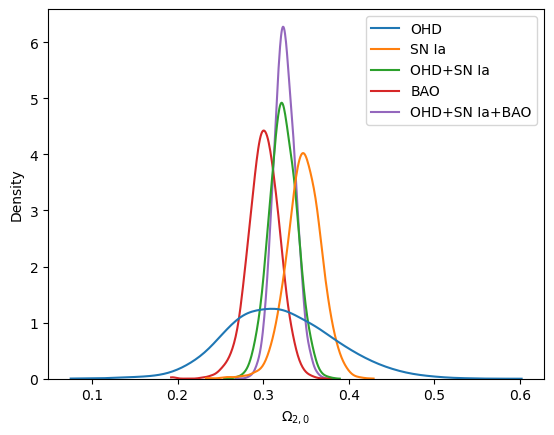

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


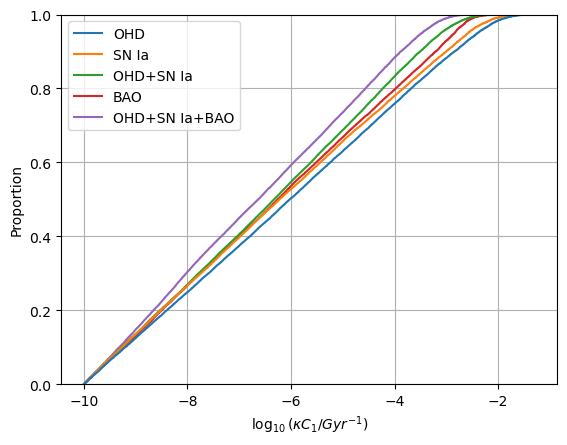

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


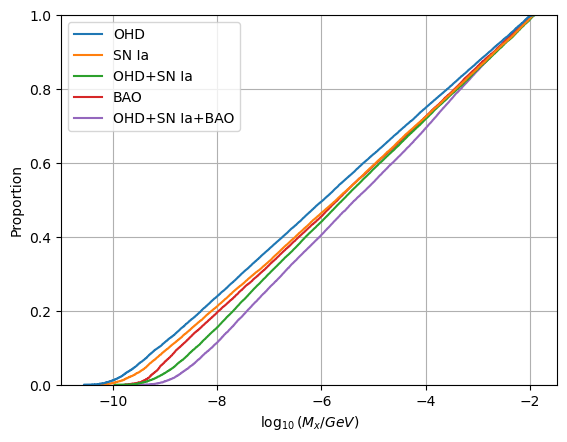

In [1]:
import multiprocessing as mp
from pdf_cdf import main

if __name__ == '__main__':
    mp.freeze_support()
    main()